[View in Colaboratory](https://colab.research.google.com/github/NehaAgarwal2598/MLCC_Sessions/blob/master/session3.ipynb)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
files.upload()

Saving fruit_data_with_colors.txt to fruit_data_with_colors.txt


{'fruit_data_with_colors.txt': b'fruit_label\tfruit_name\tfruit_subtype\tmass\twidth\theight\tcolor_score\r\n1\tapple\tgranny_smith\t192\t8.4\t7.3\t0.55\r\n1\tapple\tgranny_smith\t180\t8.0\t6.8\t0.59\r\n1\tapple\tgranny_smith\t176\t7.4\t7.2\t0.60\r\n2\tmandarin\tmandarin\t86 \t6.2\t4.7\t0.80\r\n2\tmandarin\tmandarin\t84 \t6.0\t4.6\t0.79\r\n2\tmandarin\tmandarin\t80 \t5.8\t4.3\t0.77\r\n2\tmandarin\tmandarin\t80 \t5.9 \t4.3\t0.81\r\n2\tmandarin\tmandarin\t76\t5.8\t4.0\t0.81\r\n1\tapple\tbraeburn\t178\t7.1\t7.8\t0.92\r\n1\tapple\tbraeburn\t172\t7.4\t7.0\t0.89\r\n1\tapple\tbraeburn\t166\t6.9\t7.3\t0.93\r\n1\tapple\tbraeburn\t172\t7.1\t7.6\t0.92\r\n1\tapple\tbraeburn\t154\t7.0\t7.1\t0.88\r\n1\tapple\tgolden_delicious\t164\t7.3\t7.7\t0.70\r\n1\tapple\tgolden_delicious\t152\t7.6\t7.3\t0.69\r\n1\tapple\tgolden_delicious\t156\t7.7\t7.1\t0.69\r\n1\tapple\tgolden_delicious\t156\t7.6\t7.5\t0.67\r\n1\tapple\tgolden_delicious\t168\t7.5\t7.6\t0.73\r\n1\tapple\tcripps_pink\t162\t7.5\t7.1\t0.83\r\n1\ta

In [4]:
fruits = pd.read_table("fruit_data_with_colors.txt")
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [6]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


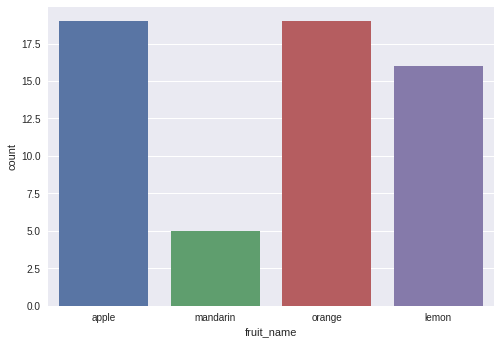

In [8]:
import seaborn as sns
sns.countplot(fruits['fruit_name'])
plt.show()

Text(0,0.5,'weight')

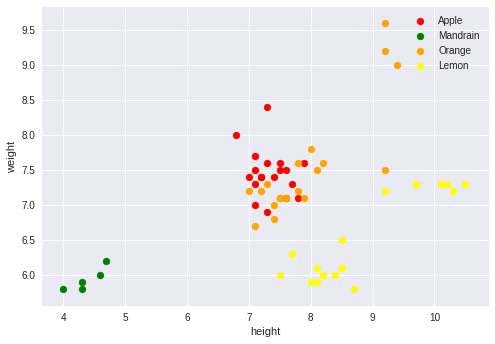

In [11]:
y = fruits['fruit_label']
X = fruits.iloc[:,3:]

plt.scatter(X[y==1]['height'],X[y==1]['width'],label='Apple', c='red')
plt.scatter(X[y==2]['height'],X[y==2]['width'],label='Mandrain', c='green')
plt.scatter(X[y==3]['height'],X[y==3]['width'],label='Orange', c='orange')
plt.scatter(X[y==4]['height'],X[y==4]['width'],label='Lemon', c='yellow')

plt.legend()
plt.xlabel('height')
plt.ylabel('weight')


Text(0,0.5,'color_score')

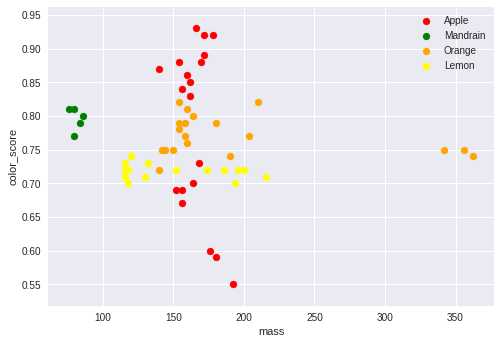

In [14]:
y = fruits['fruit_label']
X = fruits.iloc[:,3:]

plt.scatter(X[y==1]['mass'],X[y==1]['color_score'],label='Apple', c='red')
plt.scatter(X[y==2]['mass'],X[y==2]['color_score'],label='Mandrain', c='green')
plt.scatter(X[y==3]['mass'],X[y==3]['color_score'],label='Orange', c='orange')
plt.scatter(X[y==4]['mass'],X[y==4]['color_score'],label='Lemon', c='yellow')

plt.legend()
plt.xlabel('mass')
plt.ylabel('color_score')


In [0]:
features_names = ['mass', 'width', 'height', 'color_score']
X= fruits[features_names]
y = fruits['fruit_label']

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [24]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)


print('Accuracy on Train Data',logreg.score(X_train,y_train))
print('Accuracy on Test Data',logreg.score(X_test,y_test))

Accuracy on Train Data 0.7045454545454546
Accuracy on Test Data 0.4


In [25]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy on Train Data',clf.score(X_train,y_train))
print('Accuracy on Test Data',clf.score(X_test,y_test))

Accuracy on Train Data 1.0
Accuracy on Test Data 0.6666666666666666


In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)

print('Accuracy on Train Data',knn.score(X_train,y_train))
print('Accuracy on Test Data',knn.score(X_test,y_test))

Accuracy on Train Data 0.9545454545454546
Accuracy on Test Data 0.8


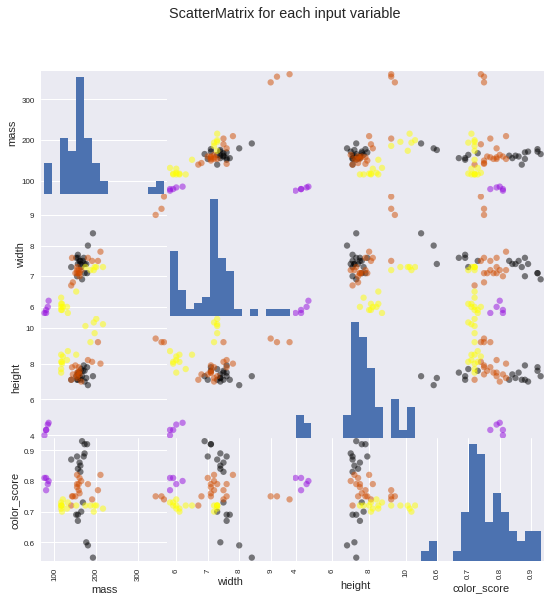

In [35]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

cmap= cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X,c=y,marker='o',s=40,hist_kwds = {'bins':15},figsize = (9,9),cmap=cmap)

plt.suptitle("ScatterMatrix for each input variable")
plt.show()

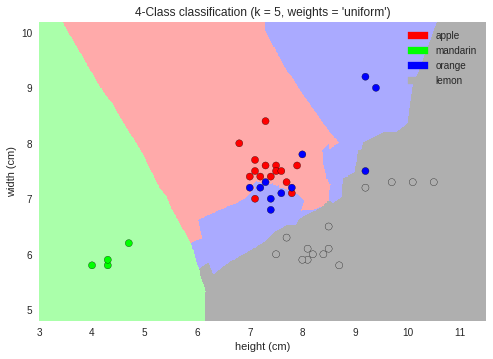

In [36]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
import numpy as np

X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()

# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')"% (n_neighbors, weights))    
    plt.show()

plot_fruit_knn(X_train, y_train, 5, 'uniform')